---
### 머신러닝 주요 개념 복습 
1. Regression model performance metrics
2. Confusion matrix
3. ROC, AUC
4. Data Encoding (label, one-hot)
5. Feature Scaling (min-max, Standardization)
6. Cross Validation (K-Fold, Stratified K-Fold) 
7. 주요 ML models (Linear Regression, Logitic Regression, Decision Tress, Ensemble, Random Forest, XGBoost, LightGBM)

---

1. Regression models performance metrics
- MSLE와 RMSLE에서 log(y)가 아닌 log(y+1)을 사용했음에 주의할 것 
- 로그값이 음의 무한대가 되는 것을 방지하려고 log(x)에서 x가 0이면 값은 음의 무한대가 됨, log(1)은 0임. 

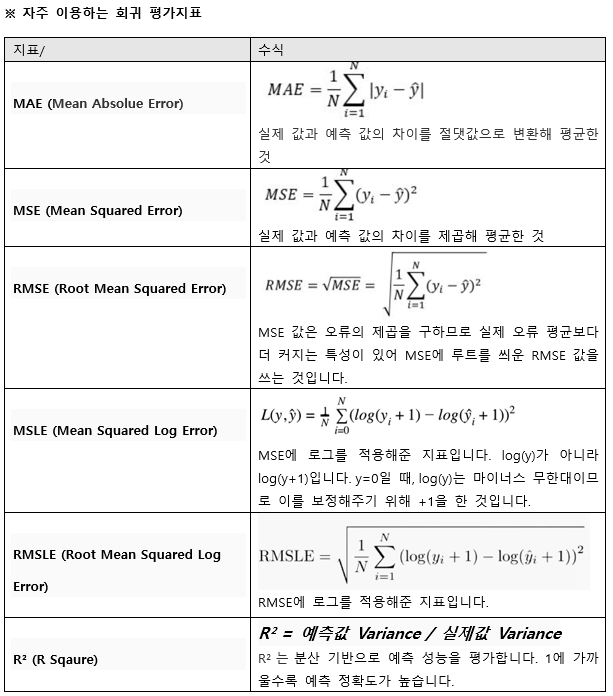

In [41]:
from IPython.display import Image
Image("images/reg_validation.PNG")

In [42]:
## 사이킷런(metrics)를 사용한 평가지표 구하기 
#!pip install scikit-learn
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = np.array([1,2,3,2,3,5,4,6,5,6,7,8,8])
preds = np.array([1,1,2,2,3,4,4,5,5,7,7,6,8])

MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(MSLE)
R2 = r2_score(true, preds)

## print results
print('MAE = \t', round(MAE, 4))
print('MSE = \t', round(MSE, 4))
print('RMSE = \t', round(RMSE, 4))
print('MSLE = \t', round(MSLE, 4))
print('RMSLE =\t', round(RMSLE, 4))
print('R2 = \t', round(R2, 4))

MAE = 	 0.5385
MSE = 	 0.6923
RMSE = 	 0.8321
MSLE = 	 0.0296
RMSLE =	 0.1721
R2 = 	 0.8617


2. Confusion matrix 
   - accuracy, precision, recall, F1 score

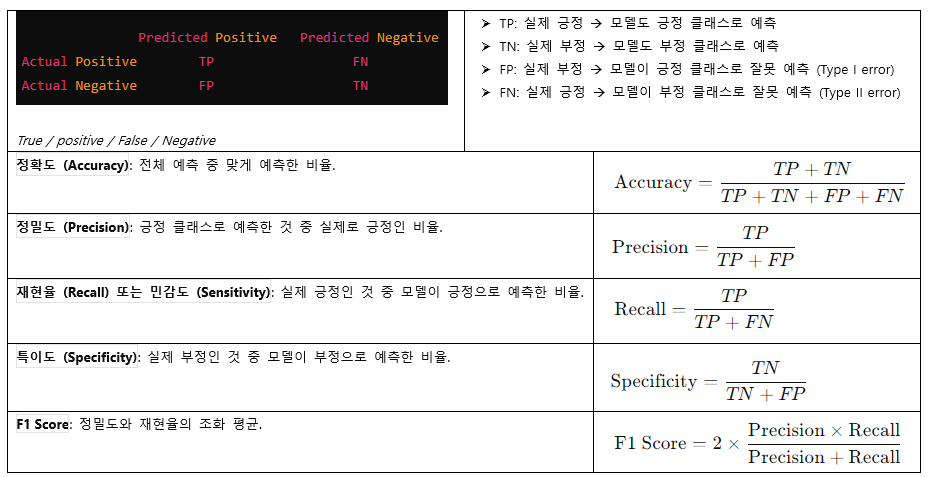

In [43]:
Image("images/confusion_matrix.PNG")

3. ROC, AUC 
   - ROC : TPR(양성을 얼마나 정확히 예측하는가?)에 대한 FPR(거짓을 얼마나 정확히 예측하는가?) 곡선.
   - AUC : ROC 곡선 아래부분의 면적. 100% 완벽하게 분류할 경우 1이 된다. 

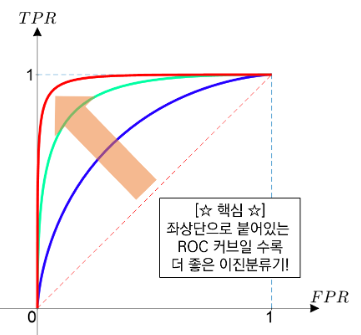

In [44]:
Image("images/roc_curve.PNG")

4. Data Encoding 
   - label encoding : 간단하지만, 명목형 데이터를 다룰 때 주의 요망. ~ "1:바나나 / 2: 딸기 / 3: 사과" 에서 바나나와 딸기를 더 가까운 관계로 오인 
   - ont hot encoding : label encoding의 단점을 해결하지만, 많은 메모리를 사용하는 단점 

In [45]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
fruits = ['apple', 'blueberry', 'banana', 'mandarin', 'blueberry', 'banana', 'banana', 'apple']

label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)

print('Labeled_data = ', fruits_label_encoded)
print('label_encoder_classes = ', label_encoder.classes_)

Labeled_data =  [0 2 1 3 2 1 1 0]
label_encoder_classes =  ['apple' 'banana' 'blueberry' 'mandarin']


In [46]:
#one-hot encoding 
##데이터가 문자열 : 먼저 label encoder로 숫자 변환 후, one hot encoder 수행 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
fruits = ['apple', 'blueberry', 'banana', 'mandarin', 'blueberry', 'banana', 'banana', 'apple']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)

##1차원 데이터를 reshape로 2차원 변환 후, array 형태로 출력 
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1,1))

print(fruits_onehot_encoded.toarray())


[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [51]:
##참고. pandas의 get_dummues()를 사용해도 같은 결과 
import pandas as pd 
fruits = ['apple', 'blueberry', 'banana', 'mandarin', 'blueberry', 'banana', 'banana', 'apple']
pd.get_dummies(fruits).astype(int)


,apple,banana,blueberry,mandarin
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,1,0,0,0


5. Feature Scaling 
   - min-max 정규화 : 피처값의 범위를 0~1사이로 조정. 피처값에서 최소값을 뺀 후, 이것을 범위(최대-최소) 로 나눈다.
   - 표준화 : 평균 0, 분산 1이 되도록 조정 

> [참고] min-max 정규화는 outlier의 영향을 크게 받는 단점이 있다. 

> [참고] 트리계열(Random Forest, XGBoost, LightGBM)등은 피처스케일링이 필요없다. 

In [61]:
##min-max 정규화
height_weight_dict = {'height':[1.7, 1.5, 1.8], 
                       'weight':[75, 55, 60]  }
df = pd.DataFrame(height_weight_dict, index = ['Park', 'Kim', 'Choi'])
print(df)

print('**************************************')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

print(df_scaled)

      height  weight
Park     1.7      75
Kim      1.5      55
Choi     1.8      60
**************************************
[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


In [62]:
#표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.26726124,  1.37281295],
       [-1.33630621, -0.98058068],
       [ 1.06904497, -0.39223227]])

6. Cross Validation 
   - K-Fold, Stratified K-Fold 

In [66]:
#K-Fold 
from sklearn.model_selection import KFold
data = np.array([0,1,2,3,4,5,6,7,8,9])

#편향방지를 위해 랜덤하게 섞어서, 데이터를 5개의 fold로 나눈다. 
folds = KFold(n_splits = 5, shuffle = True)

for train_idx, valid_idx in folds.split(data) : 
    print('train_data: ', data[train_idx], '/','valid_data: ', data[valid_idx])

train_data:  [0 1 2 3 4 5 8 9] / valid_data:  [6 7]
train_data:  [0 1 2 3 4 6 7 8] / valid_data:  [5 9]
train_data:  [2 3 4 5 6 7 8 9] / valid_data:  [0 1]
train_data:  [0 1 4 5 6 7 8 9] / valid_data:  [2 3]
train_data:  [0 1 2 3 5 6 7 9] / valid_data:  [4 8]


In [70]:
#stratified K-Fold 
from sklearn.model_selection import StratifiedKFold
X= np.array(range(50))
y= np.array(['spam_mail']*5 + ['Normal_mail']*45)

folds = StratifiedKFold(n_splits=5, shuffle = True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)): 
    print('Fold',idx+1, ':', '\n',y[valid_idx])

Fold 1 : 
 ['spam_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail'
 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail']
Fold 2 : 
 ['spam_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail'
 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail']
Fold 3 : 
 ['spam_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail'
 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail']
Fold 4 : 
 ['spam_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail'
 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail']
Fold 5 : 
 ['spam_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail'
 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail' 'Normal_mail']


7. 주요 ML models
   - Linear Regression, Logitic Regression 
   - Decision Tress
   - Ensemble
   - Random Forrest 
   - XGBoost, LightGBM

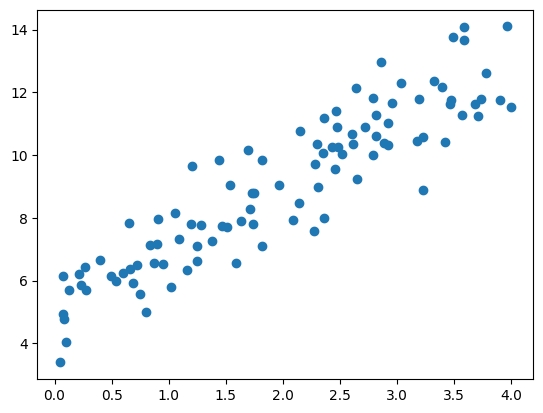

In [72]:
#Linear Regression
import matplotlib.pyplot as plt
np.random.seed(0)

#noise가 있는 데이터 생성 
w0 = 5
w1 = 2 
noise = np.random.randn(100,1) #noise 

x = 4*np.random.rand(100,1)
y = w1*x + w0 + noise 

plt.scatter(x, y)

절편 =  [5.09772262] / 회귀계수 =  [[1.9808382]]


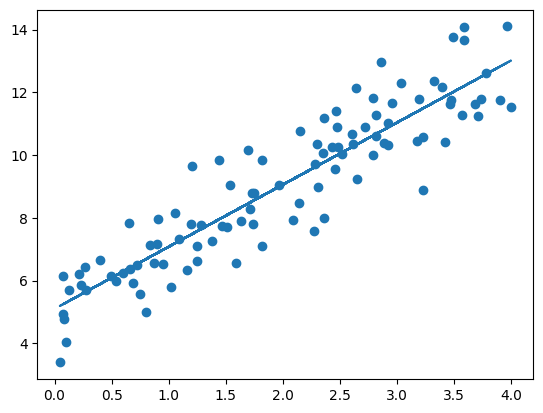

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

print('절편 = ', model.intercept_, '/', '회귀계수 = ', model.coef_)

#회귀선 출력
y_pred = model.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred)

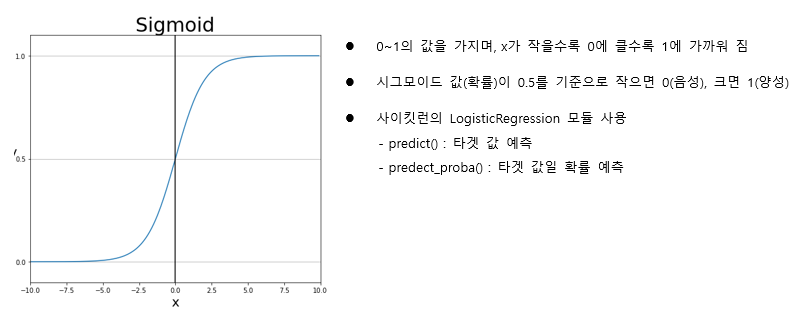

In [78]:
#Logistic Regression
Image("images/sigmoid.PNG")

In [81]:
#Decison Tree
from sklearn.datasets import load_breast_cancer #유방암 데이터셋 사용 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'],
                                                    stratify= cancer_data['target'], 
                                                    test_size = 0.4, 
                                                    random_state=42
                                                    )

#tree를 정의하고 모델 훈련 
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

#정확도 측정 
accuracy = decisiontree.score(X_test, y_test)
accuracy

0.9298245614035088

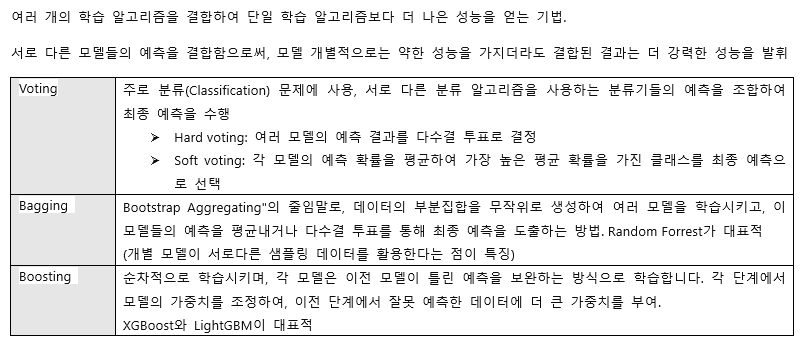

In [82]:
#ensemble 
Image("images/ensemble.PNG")

In [84]:
#Random Forest : 결정트리를 배깅 방식으로 결합한다. 
from sklearn.datasets import load_breast_cancer #유방암 데이터셋 사용 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'],
                                                    stratify= cancer_data['target'], 
                                                    test_size = 0.4, 
                                                    random_state=42
                                                    )

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
accuracy

0.9385964912280702

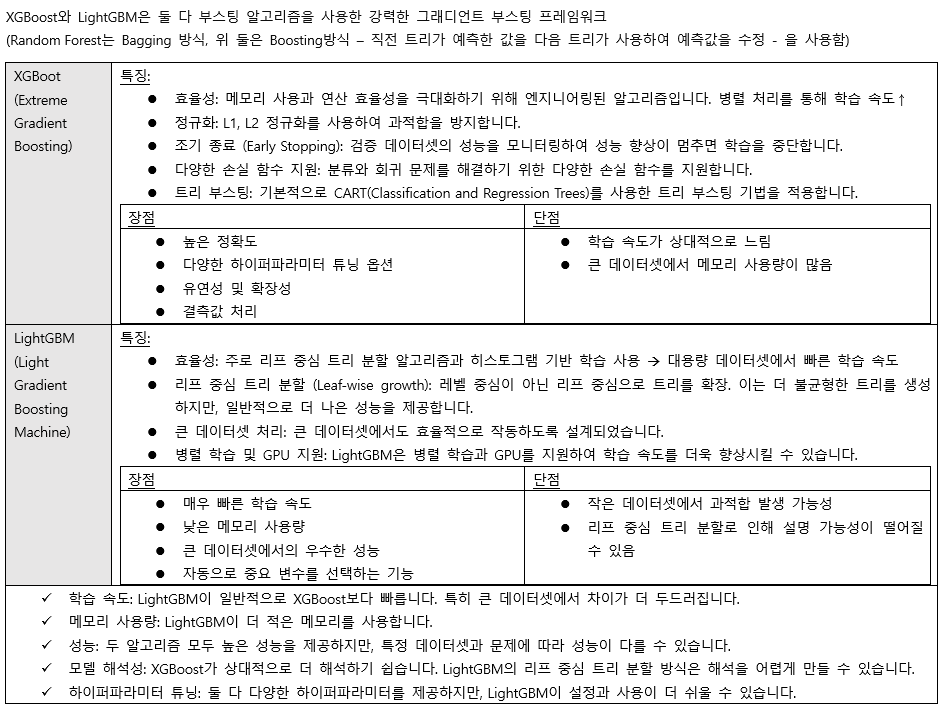

In [85]:
#XGBoost, LightGBM 
Image("images/boosting.PNG")

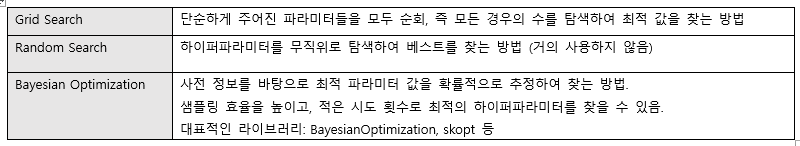

In [86]:
#Hyper parameter optimizing 
Image("images/opt.PNG")

In [90]:
#참고. Iris에 대한 RandomForest의 파라미터 최적값 찾는 사례 
#!pip install optuna
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드 및 분할
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# 목적 함수 정의
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        random_state=42
    )
    
    score = cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1).mean()
    return score

# 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=32, timeout=600)

print(f'Best parameters: {study.best_params}')
print(f'Best score: {study.best_value:.4f}')


[I 2024-06-02 23:11:21,750] A new study created in memory with name: no-name-72b31854-06f5-43d5-b880-e1f93b71fe1f


[I 2024-06-02 23:11:22,299] Trial 0 finished with value: 0.942857142857143 and parameters: {'n_estimators': 187, 'max_depth': 15, 'min_samples_split': 3}. Best is trial 0 with value: 0.942857142857143.
[I 2024-06-02 23:11:22,662] Trial 1 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 112, 'max_depth': 16, 'min_samples_split': 8}. Best is trial 0 with value: 0.942857142857143.
[I 2024-06-02 23:11:23,003] Trial 2 finished with value: 0.942857142857143 and parameters: {'n_estimators': 106, 'max_depth': 16, 'min_samples_split': 7}. Best is trial 0 with value: 0.942857142857143.
[I 2024-06-02 23:11:23,069] Trial 3 finished with value: 0.9523809523809524 and parameters: {'n_estimators': 12, 'max_depth': 11, 'min_samples_split': 7}. Best is trial 3 with value: 0.9523809523809524.
[I 2024-06-02 23:11:23,420] Trial 4 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 113, 'max_depth': 13, 'min_samples_split': 5}. Best is trial 3 with value: 0.9523

Best parameters: {'n_estimators': 12, 'max_depth': 11, 'min_samples_split': 7}
Best score: 0.9524
